In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [4]:
from sklearn import neighbors

# model 
knn= neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.loudness)  # pd.DataFrame ensure the title

y = music.bpm
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [11]:
# prediction line

T = np.arange(0, 50, .1)[:, np.newaxis]

In [12]:
Y_ = knn.predict(T)

In [14]:
print(X.shape, y.shape, T.shape, Y_.shape)

(30, 1) (30,) (500, 1) (500,)


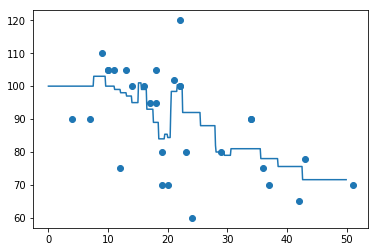

In [15]:
plt.scatter(X, y)
plt.plot(T, Y_)

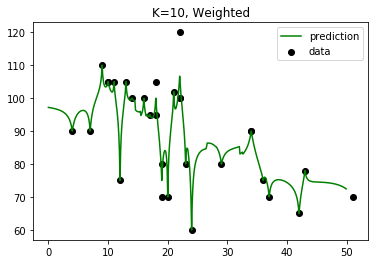

In [16]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.28 (+/- 1.20)
Weighted Accuracy: 0.11 (+/- 0.94)


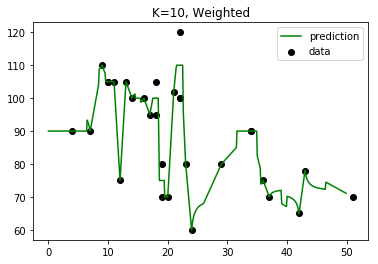

Unweighted Accuracy: -0.28 (+/- 1.20)
Weighted Accuracy: -0.27 (+/- 2.36)


In [20]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

In [24]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(music, test_size=.3)
train_X = train[['duration']]
train_y = train['bpm']

test_X = test[['duration']]
test_y = test['bpm']

In [23]:
from sklearn import neighbors
knn_reg = neighbors.KNeighborsRegressor()

knn_reg.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

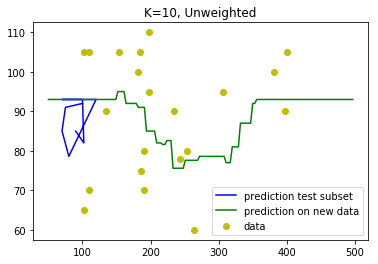

In [30]:
# Set up our prediction line.
T = np.arange(50, 500, 3)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_reg.predict(test_X)
Y_T = knn_reg.predict(T)

plt.scatter(train_X, train_y, c='y', label='data')
plt.plot(test_y, Y_, c='b', label='prediction test subset')
plt.plot(T, Y_T, c='g', label='prediction on new data')

plt.legend()
plt.title('K=10, Unweighted')
plt.show()

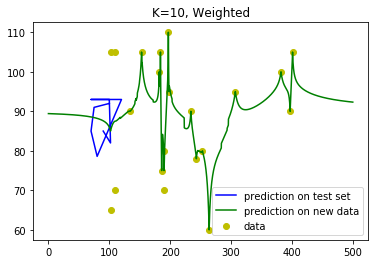

In [33]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
#X = pd.DataFrame(music.duration)
#Y = music.bpm
#knn_w.fit(X, Y)

knn_w.fit(train_X, train_y)

# test on test set
Y_ = knn_reg.predict(test_X)


# Set up our prediction line.
T = np.arange(0, 500, 0.1)[:, np.newaxis]
Y_T = knn_w.predict(T)


plt.scatter(train_X, train_y, c='y', label='data')
plt.plot(test_y, Y_, c='b', label='prediction on test set')
plt.plot(T, Y_T, c='g', label='prediction on new data')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

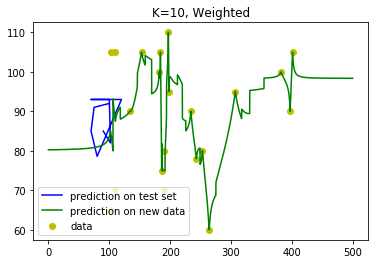

In [34]:
# Run the same model, this time with weights.

# reducing k to 3
knn_w = neighbors.KNeighborsRegressor(n_neighbors=3, weights='distance')
#X = pd.DataFrame(music.duration)
#Y = music.bpm
#knn_w.fit(X, Y)

knn_w.fit(train_X, train_y)

# test on test set
Y_ = knn_reg.predict(test_X)


# Set up our prediction line.
T = np.arange(0, 500, 0.1)[:, np.newaxis]
Y_T = knn_w.predict(T)


plt.scatter(train_X, train_y, c='y', label='data')
plt.plot(test_y, Y_, c='b', label='prediction on test set')
plt.plot(T, Y_T, c='g', label='prediction on new data')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [35]:
score = cross_val_score(knn_reg, train_X, train_y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, train_X, train_y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -1.10 (+/- 1.60)
Weighted Accuracy: -1.53 (+/- 3.13)
